# Chapter 5.2 - Using convnets with small datasets

## Import data from Kaggle (requires an account):
https://www.kaggle.com/c/dogs-vs-cats/data

In [1]:
# Importing necessary tools
import os, shutil

In [2]:
# Replace the values with correct directory for you setup

# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = 'E:/1_GitHub/arcyfelix/datasets/Dogs_vs_cats'

# The directory where we will
# store our smaller dataset
base_dir = 'E:/1_GitHub/arcyfelix/Courses/In Progress-Deep Learning With Python by François Chollet/data/Chapter 5.2 - Using convets with small datasets'

In [3]:
# Directories for our training,
# validation and test splits

# Creating train folder
train_dir = os.path.join(base_dir, 'train')
try:
    os.mkdir(train_dir)
except:
    print('Folder train already exists')
    
# Creating validation folder
validation_dir = os.path.join(base_dir, 'validation')
try:
    os.mkdir(validation_dir)
except:
    print('Folder validation already exists')
    
# Creating test folder
test_dir = os.path.join(base_dir, 'test')
try:
    os.mkdir(test_dir)
except:
    print('Folder test already exists')

Folder train already exists
Folder validation already exists
Folder test already exists


In [4]:
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
try:
    os.mkdir(train_cats_dir)
except:
    print('Train: Folder cats already exists')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
try:
    os.mkdir(train_dogs_dir)
except:
    print('Train: Folder dogs already exists')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
try:
    os.mkdir(validation_cats_dir)
except:
    print('Validation: Folder cats already exists')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
try:    
    os.mkdir(validation_dogs_dir)
except:
    print('Validation: Folder dogs already exists')

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
try:
    os.mkdir(test_cats_dir)
except:
    print('Test: Folder cats already exists')

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
try:
    os.mkdir(test_dogs_dir)
except:
    print('Test: Folder dogs already exists')

Train: Folder cats already exists
Train: Folder dogs already exists
Validation: Folder cats already exists
Validation: Folder dogs already exists
Test: Folder cats already exists
Test: Folder dogs already exists


In [5]:
# Importing tqdm to show the progress bar
from tqdm import tqdm

### Copying cat images

In [6]:
# Copy first 1000 cat images to train_cats_dir from the original train folder
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in tqdm(fnames, ascii = True):
    src = os.path.join(original_dataset_dir, 'train',  fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir from the original train folder
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in tqdm(fnames, ascii = True):
    src = os.path.join(original_dataset_dir, 'train',  fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir from the original train folder
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in tqdm(fnames, ascii = True):
    src = os.path.join(original_dataset_dir, 'train',  fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

100%|######################################################################################################################################################################| 500/500 [00:03<00:00, 156.17it/s]


In [7]:
# Copy first 1000 dog images to train_dogs_dir from the original train folder
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in tqdm(fnames, ascii = True):
    src = os.path.join(original_dataset_dir, 'train', fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir from the original train folder
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in tqdm(fnames, ascii = True):
    src = os.path.join(original_dataset_dir, 'train', fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir from the original train folder
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in tqdm(fnames, ascii = True):
    src = os.path.join(original_dataset_dir, 'train', fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

100%|######################################################################################################################################################################| 500/500 [00:03<00:00, 151.14it/s]


In [8]:
# Prompting how many pictures has been copied to the folders for debugging purposes
print('Train -> Total training cat images:', len(os.listdir(train_cats_dir)))
print('Train -> Total training dog images:', len(os.listdir(train_dogs_dir)))

print('Validation -> Total training cat images:', len(os.listdir(validation_cats_dir)))
print('Validation -> Total training dog images:', len(os.listdir(validation_dogs_dir)))

print('Test -> Total training cat images:', len(os.listdir(test_cats_dir)))
print('Test -> Total training dog images:', len(os.listdir(test_dogs_dir)))

Train -> Total training cat images: 1000
Train -> Total training dog images: 1000
Validation -> Total training cat images: 500
Validation -> Total training dog images: 500
Test -> Total training cat images: 500
Test -> Total training dog images: 500


## Building the network

In [9]:
# Importing required building blocks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Using TensorFlow backend.


In [10]:
model = Sequential()

model.add(Conv2D(filters = 32, 
                 kernel_size = (3,3), 
                 activation = 'relu', 
                 input_shape = (150, 150, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, 
                 kernel_size = (3,3), 
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 128, 
                 kernel_size = (3,3), 
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 128, 
                 kernel_size = (3,3), 
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(units = 512, 
                activation = 'relu'))

model.add(Dense(units = 1, 
                activation = 'sigmoid'))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [12]:
# Optimizing RMSprop
from keras.optimizers import RMSprop

In [13]:
# Compiling the model
model.compile(loss = 'binary_crossentropy', 
              optimizer = RMSprop(lr = 1e-4), 
              metrics = ['acc'])

## Data preprocessing

In [14]:
# Importing ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

In [15]:
# Rescaling all images by 1/255 to normalize it to be between 0 and 1.
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

### Turning images files on disk into batches of preprocessed tensors

In [16]:
train_generator = train_datagen.flow_from_directory(directory = train_dir, 
                                                    target_size = (150, 150), 
                                                    batch_size = 20, 
                                                    class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [17]:
validation_generator = train_datagen.flow_from_directory(directory = validation_dir,
                                                         target_size = (150, 150), 
                                                         batch_size = 20, 
                                                         class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [18]:
for data_batch, labels_batch in train_generator:
    print('Data batch shape:', data_batch.shape)
    print('Labels batch shape:', labels_batch.shape)
    break

Data batch shape: (20, 150, 150, 3)
Labels batch shape: (20,)


## Training

In [19]:
history = model.fit_generator(generator = train_generator, 
                              # Steps per epoch -> number of batches
                              steps_per_epoch = 100, 
                              epochs = 30, 
                              validation_data = validation_generator, 
                              validation_steps = 50, 
                              verbose = 0)

In [20]:
# Saving the model after training
model.save('.\saved_checkpoints\Chapter 5.2 - Using convets with small datasets\cats_and_dogs_small_1.h5')

## Displaying progress during the training

In [21]:
# Importing Matplotlib 
import matplotlib.pyplot as plt

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [23]:
epochs = range(1, len(acc) + 1)

In [24]:
plt.figure(figsize = (10, 6))
plt.plot(epochs, 
         acc, 
         'bo', 
         label = 'Training acc')
plt.plot(epochs, 
         val_acc, 
         'b', 
         label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

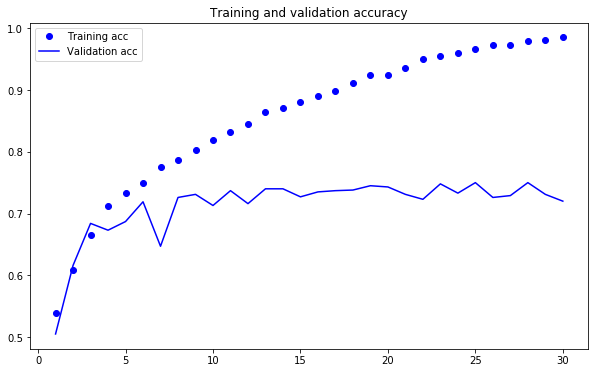

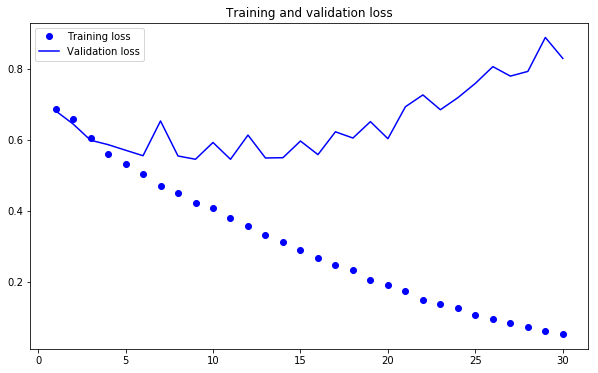

In [25]:
plt.figure(figsize = (10, 6))
plt.plot(epochs, 
         loss, 
         'bo', 
         label = 'Training loss')
plt.plot(epochs,
         val_loss, 
         'b', 
         label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Data augmentation

In [26]:
datagen = ImageDataGenerator(rotation_range = 40,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             fill_mode = 'nearest')

In [27]:
# Importing module to deal with images
from keras.preprocessing import image

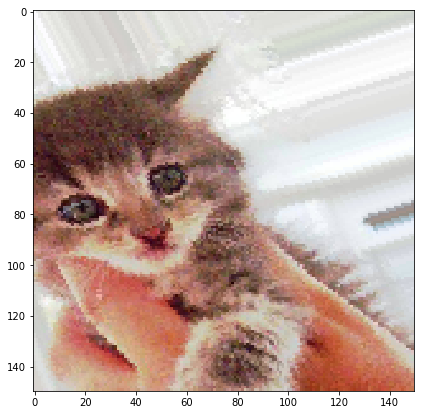

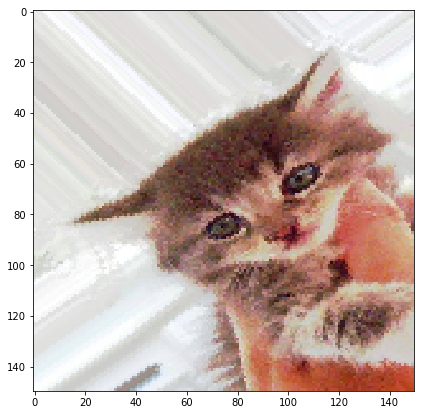

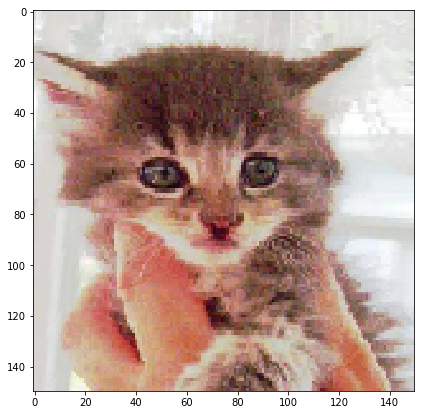

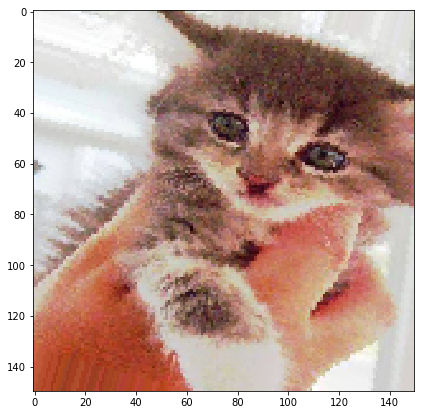

In [28]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# Picking a specific image to be preprocessed
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i, figsize = (7, 7))
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

## Building a network that includes dropout

In [29]:
# Importing Dropout
from keras.layers import Dropout

In [30]:
model = Sequential()

model.add(Conv2D(filters = 32, 
                 kernel_size = (3,3), 
                 activation = 'relu', 
                 input_shape = (150, 150, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, 
                 kernel_size = (3,3), 
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 128, 
                 kernel_size = (3,3), 
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 128, 
                 kernel_size = (3,3), 
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dropout(rate = 0.5))
model.add(Dense(units = 512, 
                activation = 'relu'))

model.add(Dense(units = 1, 
                activation = 'sigmoid'))

In [31]:
# Compiling the model
model.compile(loss = 'binary_crossentropy', 
              optimizer = RMSprop(lr = 1e-4), 
              metrics = ['acc'])

### Augmenting the data

In [32]:
# The training data will be augmented
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [33]:
# The test and validation data SHOULDN'T BE AUGMENTED! 
# Only rescaled!
test_and_validation_datagen = ImageDataGenerator(rescale = 1./255)

In [34]:
# Flow from directory for the  training dataset
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [35]:
validation_generator = test_and_validation_datagen.flow_from_directory(directory = validation_dir,
                                                                       target_size = (150, 150),
                                                                       batch_size = 32,
                                                                       class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [36]:
# Training
history = model.fit_generator(generator = train_generator,
                              steps_per_epoch = 100,
                              epochs = 100,
                              validation_data = validation_generator,
                              validation_steps = 50,
                              verbose = 1)

Epoch 1/100
100/100 [==============================] - ETA: 120s - loss: 0.6876 - acc: 0.500 - ETA: 63s - loss: 0.6860 - acc: 0.515 - ETA: 48s - loss: 0.6925 - acc: 0.46 - ETA: 44s - loss: 0.6986 - acc: 0.46 - ETA: 41s - loss: 0.6973 - acc: 0.47 - ETA: 39s - loss: 0.6963 - acc: 0.46 - ETA: 37s - loss: 0.6967 - acc: 0.47 - ETA: 35s - loss: 0.6969 - acc: 0.47 - ETA: 34s - loss: 0.6960 - acc: 0.48 - ETA: 34s - loss: 0.6921 - acc: 0.50 - ETA: 33s - loss: 0.6895 - acc: 0.51 - ETA: 32s - loss: 0.6934 - acc: 0.51 - ETA: 32s - loss: 0.6928 - acc: 0.51 - ETA: 31s - loss: 0.6906 - acc: 0.52 - ETA: 30s - loss: 0.6898 - acc: 0.52 - ETA: 30s - loss: 0.6902 - acc: 0.52 - ETA: 29s - loss: 0.6896 - acc: 0.52 - ETA: 29s - loss: 0.6885 - acc: 0.52 - ETA: 29s - loss: 0.6873 - acc: 0.53 - ETA: 28s - loss: 0.6867 - acc: 0.53 - ETA: 28s - loss: 0.6853 - acc: 0.53 - ETA: 27s - loss: 0.6899 - acc: 0.52 - ETA: 27s - loss: 0.6901 - acc: 0.52 - ETA: 26s - loss: 0.6905 - acc: 0.52 - ETA: 26s - loss: 0.6903 - acc:

100/100 [==============================] - ETA: 6s - loss: 0.5791 - acc: 0.750 - ETA: 6s - loss: 0.6598 - acc: 0.625 - ETA: 6s - loss: 0.6449 - acc: 0.635 - ETA: 6s - loss: 0.6413 - acc: 0.609 - ETA: 6s - loss: 0.6342 - acc: 0.625 - ETA: 6s - loss: 0.6258 - acc: 0.630 - ETA: 6s - loss: 0.6270 - acc: 0.625 - ETA: 6s - loss: 0.6204 - acc: 0.628 - ETA: 6s - loss: 0.6146 - acc: 0.645 - ETA: 6s - loss: 0.6249 - acc: 0.631 - ETA: 6s - loss: 0.6292 - acc: 0.625 - ETA: 6s - loss: 0.6236 - acc: 0.638 - ETA: 8s - loss: 0.6337 - acc: 0.625 - ETA: 9s - loss: 0.6311 - acc: 0.629 - ETA: 10s - loss: 0.6288 - acc: 0.63 - ETA: 11s - loss: 0.6238 - acc: 0.64 - ETA: 12s - loss: 0.6230 - acc: 0.64 - ETA: 13s - loss: 0.6232 - acc: 0.65 - ETA: 13s - loss: 0.6271 - acc: 0.64 - ETA: 14s - loss: 0.6264 - acc: 0.64 - ETA: 15s - loss: 0.6276 - acc: 0.63 - ETA: 15s - loss: 0.6270 - acc: 0.63 - ETA: 15s - loss: 0.6242 - acc: 0.64 - ETA: 15s - loss: 0.6242 - acc: 0.64 - ETA: 16s - loss: 0.6272 - acc: 0.63 - ETA: 16

100/100 [==============================] - ETA: 7s - loss: 0.5392 - acc: 0.750 - ETA: 7s - loss: 0.5296 - acc: 0.765 - ETA: 7s - loss: 0.5665 - acc: 0.718 - ETA: 7s - loss: 0.5634 - acc: 0.695 - ETA: 7s - loss: 0.5587 - acc: 0.712 - ETA: 7s - loss: 0.5553 - acc: 0.718 - ETA: 8s - loss: 0.5763 - acc: 0.723 - ETA: 7s - loss: 0.5779 - acc: 0.710 - ETA: 7s - loss: 0.5737 - acc: 0.715 - ETA: 7s - loss: 0.5814 - acc: 0.709 - ETA: 7s - loss: 0.5735 - acc: 0.721 - ETA: 8s - loss: 0.5807 - acc: 0.705 - ETA: 10s - loss: 0.5813 - acc: 0.70 - ETA: 11s - loss: 0.5980 - acc: 0.69 - ETA: 12s - loss: 0.6042 - acc: 0.68 - ETA: 13s - loss: 0.6061 - acc: 0.68 - ETA: 13s - loss: 0.6067 - acc: 0.67 - ETA: 14s - loss: 0.6053 - acc: 0.67 - ETA: 13s - loss: 0.6052 - acc: 0.67 - ETA: 14s - loss: 0.6025 - acc: 0.67 - ETA: 14s - loss: 0.6115 - acc: 0.66 - ETA: 14s - loss: 0.6104 - acc: 0.66 - ETA: 14s - loss: 0.6115 - acc: 0.66 - ETA: 14s - loss: 0.6089 - acc: 0.67 - ETA: 14s - loss: 0.6041 - acc: 0.67 - ETA: 15

100/100 [==============================] - ETA: 6s - loss: 0.6146 - acc: 0.656 - ETA: 6s - loss: 0.5395 - acc: 0.718 - ETA: 6s - loss: 0.5132 - acc: 0.729 - ETA: 6s - loss: 0.5311 - acc: 0.710 - ETA: 6s - loss: 0.5347 - acc: 0.718 - ETA: 6s - loss: 0.5476 - acc: 0.703 - ETA: 6s - loss: 0.5456 - acc: 0.700 - ETA: 6s - loss: 0.5474 - acc: 0.699 - ETA: 6s - loss: 0.5597 - acc: 0.697 - ETA: 6s - loss: 0.5526 - acc: 0.693 - ETA: 6s - loss: 0.5516 - acc: 0.693 - ETA: 6s - loss: 0.5438 - acc: 0.703 - ETA: 7s - loss: 0.5499 - acc: 0.697 - ETA: 8s - loss: 0.5612 - acc: 0.680 - ETA: 9s - loss: 0.5667 - acc: 0.675 - ETA: 10s - loss: 0.5677 - acc: 0.67 - ETA: 11s - loss: 0.5668 - acc: 0.67 - ETA: 11s - loss: 0.5652 - acc: 0.68 - ETA: 12s - loss: 0.5668 - acc: 0.67 - ETA: 12s - loss: 0.5696 - acc: 0.67 - ETA: 12s - loss: 0.5646 - acc: 0.68 - ETA: 13s - loss: 0.5611 - acc: 0.68 - ETA: 13s - loss: 0.5562 - acc: 0.68 - ETA: 13s - loss: 0.5610 - acc: 0.68 - ETA: 13s - loss: 0.5584 - acc: 0.69 - ETA: 13

100/100 [==============================] - ETA: 6s - loss: 0.5722 - acc: 0.625 - ETA: 6s - loss: 0.6187 - acc: 0.593 - ETA: 6s - loss: 0.5501 - acc: 0.677 - ETA: 6s - loss: 0.5652 - acc: 0.664 - ETA: 6s - loss: 0.5534 - acc: 0.681 - ETA: 6s - loss: 0.5509 - acc: 0.687 - ETA: 6s - loss: 0.5523 - acc: 0.692 - ETA: 6s - loss: 0.5305 - acc: 0.718 - ETA: 6s - loss: 0.5197 - acc: 0.722 - ETA: 6s - loss: 0.5200 - acc: 0.725 - ETA: 6s - loss: 0.5092 - acc: 0.735 - ETA: 6s - loss: 0.5071 - acc: 0.737 - ETA: 7s - loss: 0.5185 - acc: 0.735 - ETA: 8s - loss: 0.5190 - acc: 0.738 - ETA: 9s - loss: 0.5170 - acc: 0.737 - ETA: 10s - loss: 0.5117 - acc: 0.73 - ETA: 10s - loss: 0.5227 - acc: 0.73 - ETA: 11s - loss: 0.5265 - acc: 0.73 - ETA: 11s - loss: 0.5272 - acc: 0.73 - ETA: 11s - loss: 0.5225 - acc: 0.73 - ETA: 12s - loss: 0.5260 - acc: 0.73 - ETA: 12s - loss: 0.5224 - acc: 0.73 - ETA: 12s - loss: 0.5211 - acc: 0.73 - ETA: 12s - loss: 0.5254 - acc: 0.73 - ETA: 13s - loss: 0.5233 - acc: 0.73 - ETA: 13

100/100 [==============================] - ETA: 6s - loss: 0.5984 - acc: 0.656 - ETA: 6s - loss: 0.6106 - acc: 0.671 - ETA: 6s - loss: 0.6503 - acc: 0.666 - ETA: 6s - loss: 0.6141 - acc: 0.671 - ETA: 6s - loss: 0.5927 - acc: 0.675 - ETA: 6s - loss: 0.6001 - acc: 0.661 - ETA: 6s - loss: 0.5882 - acc: 0.678 - ETA: 6s - loss: 0.5915 - acc: 0.683 - ETA: 6s - loss: 0.5818 - acc: 0.694 - ETA: 6s - loss: 0.5506 - acc: 0.725 - ETA: 6s - loss: 0.5478 - acc: 0.718 - ETA: 5s - loss: 0.5439 - acc: 0.716 - ETA: 6s - loss: 0.5455 - acc: 0.713 - ETA: 7s - loss: 0.5494 - acc: 0.703 - ETA: 8s - loss: 0.5567 - acc: 0.700 - ETA: 8s - loss: 0.5581 - acc: 0.695 - ETA: 9s - loss: 0.5493 - acc: 0.700 - ETA: 9s - loss: 0.5469 - acc: 0.706 - ETA: 10s - loss: 0.5491 - acc: 0.70 - ETA: 10s - loss: 0.5549 - acc: 0.70 - ETA: 11s - loss: 0.5574 - acc: 0.69 - ETA: 11s - loss: 0.5568 - acc: 0.70 - ETA: 11s - loss: 0.5554 - acc: 0.70 - ETA: 11s - loss: 0.5549 - acc: 0.70 - ETA: 12s - loss: 0.5517 - acc: 0.70 - ETA: 12

100/100 [==============================] - ETA: 6s - loss: 0.3617 - acc: 0.843 - ETA: 6s - loss: 0.3729 - acc: 0.828 - ETA: 6s - loss: 0.4865 - acc: 0.750 - ETA: 6s - loss: 0.4871 - acc: 0.757 - ETA: 6s - loss: 0.4855 - acc: 0.768 - ETA: 6s - loss: 0.4932 - acc: 0.781 - ETA: 6s - loss: 0.4858 - acc: 0.785 - ETA: 6s - loss: 0.4862 - acc: 0.781 - ETA: 6s - loss: 0.4965 - acc: 0.763 - ETA: 6s - loss: 0.5208 - acc: 0.740 - ETA: 6s - loss: 0.5113 - acc: 0.747 - ETA: 5s - loss: 0.5158 - acc: 0.739 - ETA: 6s - loss: 0.5137 - acc: 0.742 - ETA: 7s - loss: 0.5086 - acc: 0.747 - ETA: 8s - loss: 0.5283 - acc: 0.745 - ETA: 9s - loss: 0.5334 - acc: 0.742 - ETA: 9s - loss: 0.5301 - acc: 0.740 - ETA: 10s - loss: 0.5273 - acc: 0.73 - ETA: 10s - loss: 0.5203 - acc: 0.74 - ETA: 11s - loss: 0.5192 - acc: 0.74 - ETA: 11s - loss: 0.5199 - acc: 0.73 - ETA: 11s - loss: 0.5130 - acc: 0.74 - ETA: 11s - loss: 0.5186 - acc: 0.74 - ETA: 12s - loss: 0.5166 - acc: 0.74 - ETA: 12s - loss: 0.5190 - acc: 0.74 - ETA: 12

100/100 [==============================] - ETA: 6s - loss: 0.5233 - acc: 0.781 - ETA: 6s - loss: 0.4578 - acc: 0.812 - ETA: 6s - loss: 0.4902 - acc: 0.781 - ETA: 6s - loss: 0.4567 - acc: 0.820 - ETA: 6s - loss: 0.4813 - acc: 0.768 - ETA: 6s - loss: 0.4603 - acc: 0.765 - ETA: 6s - loss: 0.4657 - acc: 0.758 - ETA: 6s - loss: 0.4564 - acc: 0.765 - ETA: 6s - loss: 0.4737 - acc: 0.750 - ETA: 6s - loss: 0.4712 - acc: 0.753 - ETA: 6s - loss: 0.4961 - acc: 0.744 - ETA: 5s - loss: 0.5013 - acc: 0.747 - ETA: 6s - loss: 0.4968 - acc: 0.752 - ETA: 7s - loss: 0.4913 - acc: 0.756 - ETA: 8s - loss: 0.4909 - acc: 0.756 - ETA: 9s - loss: 0.4879 - acc: 0.755 - ETA: 10s - loss: 0.4823 - acc: 0.76 - ETA: 10s - loss: 0.4885 - acc: 0.75 - ETA: 10s - loss: 0.4861 - acc: 0.75 - ETA: 11s - loss: 0.5008 - acc: 0.74 - ETA: 11s - loss: 0.4989 - acc: 0.74 - ETA: 11s - loss: 0.4936 - acc: 0.75 - ETA: 12s - loss: 0.4945 - acc: 0.75 - ETA: 12s - loss: 0.4929 - acc: 0.75 - ETA: 12s - loss: 0.4888 - acc: 0.75 - ETA: 12

100/100 [==============================] - ETA: 6s - loss: 0.6953 - acc: 0.625 - ETA: 6s - loss: 0.5888 - acc: 0.718 - ETA: 6s - loss: 0.5416 - acc: 0.739 - ETA: 6s - loss: 0.4811 - acc: 0.781 - ETA: 6s - loss: 0.4790 - acc: 0.775 - ETA: 6s - loss: 0.4788 - acc: 0.776 - ETA: 6s - loss: 0.4582 - acc: 0.790 - ETA: 6s - loss: 0.4435 - acc: 0.800 - ETA: 6s - loss: 0.4587 - acc: 0.777 - ETA: 6s - loss: 0.4646 - acc: 0.778 - ETA: 6s - loss: 0.4594 - acc: 0.781 - ETA: 5s - loss: 0.4590 - acc: 0.778 - ETA: 7s - loss: 0.4454 - acc: 0.787 - ETA: 7s - loss: 0.4452 - acc: 0.787 - ETA: 8s - loss: 0.4518 - acc: 0.789 - ETA: 9s - loss: 0.4603 - acc: 0.781 - ETA: 9s - loss: 0.4595 - acc: 0.777 - ETA: 10s - loss: 0.4531 - acc: 0.78 - ETA: 10s - loss: 0.4580 - acc: 0.77 - ETA: 11s - loss: 0.4644 - acc: 0.77 - ETA: 11s - loss: 0.4570 - acc: 0.77 - ETA: 11s - loss: 0.4590 - acc: 0.77 - ETA: 11s - loss: 0.4599 - acc: 0.77 - ETA: 12s - loss: 0.4661 - acc: 0.77 - ETA: 12s - loss: 0.4713 - acc: 0.77 - ETA: 12

100/100 [==============================] - ETA: 6s - loss: 0.4468 - acc: 0.812 - ETA: 7s - loss: 0.4638 - acc: 0.796 - ETA: 7s - loss: 0.4344 - acc: 0.812 - ETA: 7s - loss: 0.4134 - acc: 0.804 - ETA: 7s - loss: 0.4328 - acc: 0.787 - ETA: 6s - loss: 0.4360 - acc: 0.791 - ETA: 6s - loss: 0.4270 - acc: 0.790 - ETA: 6s - loss: 0.4221 - acc: 0.789 - ETA: 6s - loss: 0.4165 - acc: 0.795 - ETA: 6s - loss: 0.4152 - acc: 0.790 - ETA: 6s - loss: 0.4321 - acc: 0.789 - ETA: 6s - loss: 0.4412 - acc: 0.786 - ETA: 8s - loss: 0.4387 - acc: 0.790 - ETA: 9s - loss: 0.4329 - acc: 0.799 - ETA: 10s - loss: 0.4321 - acc: 0.79 - ETA: 11s - loss: 0.4280 - acc: 0.79 - ETA: 12s - loss: 0.4321 - acc: 0.79 - ETA: 13s - loss: 0.4297 - acc: 0.80 - ETA: 13s - loss: 0.4448 - acc: 0.79 - ETA: 14s - loss: 0.4511 - acc: 0.79 - ETA: 14s - loss: 0.4521 - acc: 0.79 - ETA: 14s - loss: 0.4559 - acc: 0.78 - ETA: 14s - loss: 0.4514 - acc: 0.79 - ETA: 15s - loss: 0.4594 - acc: 0.78 - ETA: 15s - loss: 0.4578 - acc: 0.79 - ETA: 15

100/100 [==============================] - ETA: 6s - loss: 0.3442 - acc: 0.875 - ETA: 6s - loss: 0.4176 - acc: 0.750 - ETA: 6s - loss: 0.4311 - acc: 0.729 - ETA: 6s - loss: 0.4561 - acc: 0.726 - ETA: 6s - loss: 0.4188 - acc: 0.756 - ETA: 6s - loss: 0.4161 - acc: 0.770 - ETA: 6s - loss: 0.4390 - acc: 0.758 - ETA: 6s - loss: 0.4401 - acc: 0.753 - ETA: 6s - loss: 0.4547 - acc: 0.746 - ETA: 6s - loss: 0.4697 - acc: 0.734 - ETA: 6s - loss: 0.4759 - acc: 0.738 - ETA: 6s - loss: 0.4774 - acc: 0.739 - ETA: 8s - loss: 0.4848 - acc: 0.730 - ETA: 9s - loss: 0.4855 - acc: 0.732 - ETA: 10s - loss: 0.4839 - acc: 0.73 - ETA: 11s - loss: 0.4957 - acc: 0.73 - ETA: 12s - loss: 0.5001 - acc: 0.72 - ETA: 12s - loss: 0.4909 - acc: 0.73 - ETA: 13s - loss: 0.4905 - acc: 0.74 - ETA: 13s - loss: 0.4872 - acc: 0.74 - ETA: 14s - loss: 0.4786 - acc: 0.75 - ETA: 14s - loss: 0.4753 - acc: 0.75 - ETA: 14s - loss: 0.4751 - acc: 0.76 - ETA: 14s - loss: 0.4750 - acc: 0.76 - ETA: 15s - loss: 0.4701 - acc: 0.76 - ETA: 15

100/100 [==============================] - ETA: 6s - loss: 0.6801 - acc: 0.687 - ETA: 6s - loss: 0.6221 - acc: 0.687 - ETA: 6s - loss: 0.6145 - acc: 0.708 - ETA: 7s - loss: 0.5837 - acc: 0.718 - ETA: 7s - loss: 0.5619 - acc: 0.718 - ETA: 7s - loss: 0.5488 - acc: 0.724 - ETA: 7s - loss: 0.5467 - acc: 0.732 - ETA: 7s - loss: 0.5362 - acc: 0.738 - ETA: 6s - loss: 0.5399 - acc: 0.736 - ETA: 6s - loss: 0.5295 - acc: 0.743 - ETA: 6s - loss: 0.5386 - acc: 0.738 - ETA: 7s - loss: 0.5288 - acc: 0.747 - ETA: 8s - loss: 0.5181 - acc: 0.754 - ETA: 10s - loss: 0.5185 - acc: 0.75 - ETA: 11s - loss: 0.5023 - acc: 0.76 - ETA: 12s - loss: 0.4932 - acc: 0.77 - ETA: 13s - loss: 0.4942 - acc: 0.77 - ETA: 13s - loss: 0.4986 - acc: 0.76 - ETA: 14s - loss: 0.4932 - acc: 0.76 - ETA: 14s - loss: 0.4861 - acc: 0.76 - ETA: 15s - loss: 0.4868 - acc: 0.76 - ETA: 15s - loss: 0.4862 - acc: 0.76 - ETA: 15s - loss: 0.4816 - acc: 0.76 - ETA: 15s - loss: 0.4775 - acc: 0.76 - ETA: 15s - loss: 0.4829 - acc: 0.76 - ETA: 16

100/100 [==============================] - ETA: 6s - loss: 0.4487 - acc: 0.781 - ETA: 6s - loss: 0.3946 - acc: 0.796 - ETA: 6s - loss: 0.4563 - acc: 0.770 - ETA: 6s - loss: 0.4440 - acc: 0.781 - ETA: 6s - loss: 0.4220 - acc: 0.793 - ETA: 6s - loss: 0.4175 - acc: 0.802 - ETA: 6s - loss: 0.4442 - acc: 0.790 - ETA: 6s - loss: 0.4430 - acc: 0.793 - ETA: 6s - loss: 0.4385 - acc: 0.802 - ETA: 6s - loss: 0.4303 - acc: 0.809 - ETA: 6s - loss: 0.4230 - acc: 0.812 - ETA: 5s - loss: 0.4120 - acc: 0.817 - ETA: 6s - loss: 0.4090 - acc: 0.819 - ETA: 7s - loss: 0.4074 - acc: 0.821 - ETA: 8s - loss: 0.4148 - acc: 0.812 - ETA: 9s - loss: 0.4131 - acc: 0.808 - ETA: 10s - loss: 0.4126 - acc: 0.81 - ETA: 10s - loss: 0.4084 - acc: 0.81 - ETA: 10s - loss: 0.4104 - acc: 0.81 - ETA: 11s - loss: 0.4044 - acc: 0.81 - ETA: 11s - loss: 0.4065 - acc: 0.81 - ETA: 11s - loss: 0.4082 - acc: 0.81 - ETA: 12s - loss: 0.4071 - acc: 0.81 - ETA: 12s - loss: 0.4116 - acc: 0.80 - ETA: 12s - loss: 0.4225 - acc: 0.80 - ETA: 12

100/100 [==============================] - ETA: 6s - loss: 0.3258 - acc: 0.843 - ETA: 6s - loss: 0.3528 - acc: 0.796 - ETA: 6s - loss: 0.3597 - acc: 0.812 - ETA: 6s - loss: 0.3459 - acc: 0.820 - ETA: 6s - loss: 0.3155 - acc: 0.843 - ETA: 6s - loss: 0.3507 - acc: 0.828 - ETA: 6s - loss: 0.3473 - acc: 0.839 - ETA: 6s - loss: 0.3488 - acc: 0.835 - ETA: 6s - loss: 0.3464 - acc: 0.833 - ETA: 6s - loss: 0.3810 - acc: 0.818 - ETA: 6s - loss: 0.4212 - acc: 0.792 - ETA: 5s - loss: 0.4345 - acc: 0.786 - ETA: 6s - loss: 0.4318 - acc: 0.795 - ETA: 7s - loss: 0.4287 - acc: 0.799 - ETA: 8s - loss: 0.4187 - acc: 0.804 - ETA: 9s - loss: 0.4141 - acc: 0.808 - ETA: 9s - loss: 0.4117 - acc: 0.808 - ETA: 10s - loss: 0.4187 - acc: 0.80 - ETA: 10s - loss: 0.4243 - acc: 0.80 - ETA: 11s - loss: 0.4330 - acc: 0.80 - ETA: 11s - loss: 0.4389 - acc: 0.79 - ETA: 11s - loss: 0.4424 - acc: 0.79 - ETA: 11s - loss: 0.4382 - acc: 0.79 - ETA: 12s - loss: 0.4406 - acc: 0.79 - ETA: 12s - loss: 0.4363 - acc: 0.79 - ETA: 12

100/100 [==============================] - ETA: 6s - loss: 0.4671 - acc: 0.812 - ETA: 6s - loss: 0.5021 - acc: 0.765 - ETA: 6s - loss: 0.5436 - acc: 0.760 - ETA: 6s - loss: 0.5180 - acc: 0.781 - ETA: 6s - loss: 0.4909 - acc: 0.793 - ETA: 6s - loss: 0.4780 - acc: 0.796 - ETA: 5s - loss: 0.4272 - acc: 0.820 - ETA: 5s - loss: 0.4325 - acc: 0.812 - ETA: 5s - loss: 0.4336 - acc: 0.818 - ETA: 5s - loss: 0.4290 - acc: 0.818 - ETA: 5s - loss: 0.4316 - acc: 0.820 - ETA: 6s - loss: 0.4193 - acc: 0.831 - ETA: 7s - loss: 0.4203 - acc: 0.830 - ETA: 8s - loss: 0.4322 - acc: 0.825 - ETA: 9s - loss: 0.4322 - acc: 0.824 - ETA: 10s - loss: 0.4344 - acc: 0.81 - ETA: 10s - loss: 0.4282 - acc: 0.82 - ETA: 11s - loss: 0.4266 - acc: 0.82 - ETA: 11s - loss: 0.4301 - acc: 0.81 - ETA: 11s - loss: 0.4261 - acc: 0.81 - ETA: 11s - loss: 0.4236 - acc: 0.82 - ETA: 12s - loss: 0.4240 - acc: 0.82 - ETA: 12s - loss: 0.4217 - acc: 0.82 - ETA: 12s - loss: 0.4237 - acc: 0.81 - ETA: 12s - loss: 0.4214 - acc: 0.81 - ETA: 12

100/100 [==============================] - ETA: 6s - loss: 0.4264 - acc: 0.843 - ETA: 6s - loss: 0.4874 - acc: 0.765 - ETA: 6s - loss: 0.4900 - acc: 0.750 - ETA: 6s - loss: 0.4707 - acc: 0.765 - ETA: 6s - loss: 0.4474 - acc: 0.775 - ETA: 6s - loss: 0.4570 - acc: 0.770 - ETA: 6s - loss: 0.4541 - acc: 0.772 - ETA: 6s - loss: 0.4588 - acc: 0.769 - ETA: 6s - loss: 0.4440 - acc: 0.784 - ETA: 6s - loss: 0.4368 - acc: 0.790 - ETA: 6s - loss: 0.4238 - acc: 0.798 - ETA: 5s - loss: 0.4179 - acc: 0.799 - ETA: 6s - loss: 0.4189 - acc: 0.798 - ETA: 7s - loss: 0.4057 - acc: 0.805 - ETA: 8s - loss: 0.4049 - acc: 0.806 - ETA: 9s - loss: 0.4054 - acc: 0.810 - ETA: 10s - loss: 0.3982 - acc: 0.81 - ETA: 10s - loss: 0.4044 - acc: 0.81 - ETA: 11s - loss: 0.4025 - acc: 0.81 - ETA: 11s - loss: 0.4001 - acc: 0.81 - ETA: 11s - loss: 0.3985 - acc: 0.81 - ETA: 11s - loss: 0.3976 - acc: 0.81 - ETA: 12s - loss: 0.3998 - acc: 0.81 - ETA: 12s - loss: 0.4000 - acc: 0.81 - ETA: 12s - loss: 0.3977 - acc: 0.81 - ETA: 12

100/100 [==============================] - ETA: 6s - loss: 0.3502 - acc: 0.875 - ETA: 6s - loss: 0.3814 - acc: 0.859 - ETA: 6s - loss: 0.4249 - acc: 0.833 - ETA: 6s - loss: 0.3903 - acc: 0.851 - ETA: 6s - loss: 0.3711 - acc: 0.856 - ETA: 6s - loss: 0.3835 - acc: 0.838 - ETA: 6s - loss: 0.3847 - acc: 0.834 - ETA: 6s - loss: 0.3801 - acc: 0.832 - ETA: 6s - loss: 0.3948 - acc: 0.826 - ETA: 6s - loss: 0.3985 - acc: 0.821 - ETA: 6s - loss: 0.3852 - acc: 0.832 - ETA: 5s - loss: 0.3855 - acc: 0.825 - ETA: 6s - loss: 0.3859 - acc: 0.822 - ETA: 7s - loss: 0.3883 - acc: 0.821 - ETA: 8s - loss: 0.3815 - acc: 0.822 - ETA: 9s - loss: 0.3794 - acc: 0.824 - ETA: 10s - loss: 0.3943 - acc: 0.81 - ETA: 10s - loss: 0.4005 - acc: 0.81 - ETA: 10s - loss: 0.4056 - acc: 0.81 - ETA: 11s - loss: 0.3974 - acc: 0.82 - ETA: 11s - loss: 0.3930 - acc: 0.81 - ETA: 12s - loss: 0.3982 - acc: 0.81 - ETA: 12s - loss: 0.4009 - acc: 0.81 - ETA: 12s - loss: 0.4027 - acc: 0.81 - ETA: 12s - loss: 0.4009 - acc: 0.81 - ETA: 12

100/100 [==============================] - ETA: 6s - loss: 0.4135 - acc: 0.875 - ETA: 6s - loss: 0.4145 - acc: 0.796 - ETA: 6s - loss: 0.4138 - acc: 0.833 - ETA: 5s - loss: 0.4004 - acc: 0.856 - ETA: 5s - loss: 0.3952 - acc: 0.849 - ETA: 5s - loss: 0.4036 - acc: 0.843 - ETA: 5s - loss: 0.3950 - acc: 0.847 - ETA: 5s - loss: 0.3922 - acc: 0.840 - ETA: 5s - loss: 0.3841 - acc: 0.840 - ETA: 5s - loss: 0.3748 - acc: 0.849 - ETA: 5s - loss: 0.3762 - acc: 0.851 - ETA: 6s - loss: 0.3691 - acc: 0.853 - ETA: 8s - loss: 0.3613 - acc: 0.857 - ETA: 8s - loss: 0.3573 - acc: 0.862 - ETA: 9s - loss: 0.3511 - acc: 0.869 - ETA: 10s - loss: 0.3564 - acc: 0.86 - ETA: 10s - loss: 0.3572 - acc: 0.86 - ETA: 11s - loss: 0.3564 - acc: 0.86 - ETA: 11s - loss: 0.3505 - acc: 0.85 - ETA: 11s - loss: 0.3518 - acc: 0.85 - ETA: 12s - loss: 0.3519 - acc: 0.85 - ETA: 12s - loss: 0.3696 - acc: 0.84 - ETA: 12s - loss: 0.3823 - acc: 0.83 - ETA: 12s - loss: 0.3817 - acc: 0.84 - ETA: 12s - loss: 0.3803 - acc: 0.83 - ETA: 12

100/100 [==============================] - ETA: 6s - loss: 0.6243 - acc: 0.750 - ETA: 6s - loss: 0.5310 - acc: 0.781 - ETA: 6s - loss: 0.4511 - acc: 0.812 - ETA: 6s - loss: 0.4399 - acc: 0.804 - ETA: 6s - loss: 0.4764 - acc: 0.793 - ETA: 6s - loss: 0.4499 - acc: 0.807 - ETA: 6s - loss: 0.4221 - acc: 0.821 - ETA: 6s - loss: 0.4055 - acc: 0.828 - ETA: 6s - loss: 0.4168 - acc: 0.816 - ETA: 6s - loss: 0.4287 - acc: 0.809 - ETA: 6s - loss: 0.4209 - acc: 0.815 - ETA: 5s - loss: 0.4140 - acc: 0.820 - ETA: 6s - loss: 0.4056 - acc: 0.826 - ETA: 7s - loss: 0.4131 - acc: 0.819 - ETA: 8s - loss: 0.4140 - acc: 0.814 - ETA: 9s - loss: 0.4144 - acc: 0.812 - ETA: 9s - loss: 0.4070 - acc: 0.821 - ETA: 10s - loss: 0.4167 - acc: 0.81 - ETA: 10s - loss: 0.4135 - acc: 0.81 - ETA: 11s - loss: 0.4108 - acc: 0.81 - ETA: 11s - loss: 0.4033 - acc: 0.81 - ETA: 11s - loss: 0.4033 - acc: 0.81 - ETA: 12s - loss: 0.4007 - acc: 0.81 - ETA: 12s - loss: 0.3958 - acc: 0.82 - ETA: 12s - loss: 0.3993 - acc: 0.82 - ETA: 12

100/100 [==============================] - ETA: 6s - loss: 0.4981 - acc: 0.781 - ETA: 6s - loss: 0.4810 - acc: 0.765 - ETA: 6s - loss: 0.4140 - acc: 0.812 - ETA: 6s - loss: 0.3929 - acc: 0.820 - ETA: 6s - loss: 0.3730 - acc: 0.825 - ETA: 6s - loss: 0.3585 - acc: 0.822 - ETA: 6s - loss: 0.3638 - acc: 0.830 - ETA: 6s - loss: 0.3570 - acc: 0.832 - ETA: 6s - loss: 0.3662 - acc: 0.822 - ETA: 6s - loss: 0.3763 - acc: 0.809 - ETA: 6s - loss: 0.3809 - acc: 0.804 - ETA: 5s - loss: 0.3798 - acc: 0.812 - ETA: 6s - loss: 0.3763 - acc: 0.817 - ETA: 7s - loss: 0.3803 - acc: 0.819 - ETA: 8s - loss: 0.3775 - acc: 0.820 - ETA: 9s - loss: 0.3708 - acc: 0.824 - ETA: 9s - loss: 0.3808 - acc: 0.821 - ETA: 10s - loss: 0.3760 - acc: 0.82 - ETA: 10s - loss: 0.3810 - acc: 0.82 - ETA: 11s - loss: 0.3810 - acc: 0.82 - ETA: 11s - loss: 0.3844 - acc: 0.82 - ETA: 11s - loss: 0.3790 - acc: 0.82 - ETA: 11s - loss: 0.3694 - acc: 0.83 - ETA: 11s - loss: 0.3707 - acc: 0.83 - ETA: 11s - loss: 0.3710 - acc: 0.83 - ETA: 12

100/100 [==============================] - ETA: 3s - loss: 0.3510 - acc: 0.875 - ETA: 5s - loss: 0.3753 - acc: 0.890 - ETA: 5s - loss: 0.3710 - acc: 0.864 - ETA: 5s - loss: 0.3916 - acc: 0.843 - ETA: 5s - loss: 0.3740 - acc: 0.850 - ETA: 5s - loss: 0.3669 - acc: 0.838 - ETA: 5s - loss: 0.3636 - acc: 0.839 - ETA: 5s - loss: 0.3534 - acc: 0.839 - ETA: 5s - loss: 0.3553 - acc: 0.833 - ETA: 5s - loss: 0.3618 - acc: 0.831 - ETA: 5s - loss: 0.3526 - acc: 0.843 - ETA: 5s - loss: 0.3499 - acc: 0.841 - ETA: 6s - loss: 0.3472 - acc: 0.841 - ETA: 7s - loss: 0.3419 - acc: 0.848 - ETA: 8s - loss: 0.3554 - acc: 0.843 - ETA: 9s - loss: 0.3577 - acc: 0.837 - ETA: 9s - loss: 0.3617 - acc: 0.840 - ETA: 10s - loss: 0.3650 - acc: 0.83 - ETA: 10s - loss: 0.3584 - acc: 0.84 - ETA: 11s - loss: 0.3545 - acc: 0.84 - ETA: 11s - loss: 0.3577 - acc: 0.84 - ETA: 11s - loss: 0.3514 - acc: 0.84 - ETA: 11s - loss: 0.3471 - acc: 0.84 - ETA: 12s - loss: 0.3365 - acc: 0.85 - ETA: 12s - loss: 0.3512 - acc: 0.84 - ETA: 12

100/100 [==============================] - ETA: 6s - loss: 0.3059 - acc: 0.906 - ETA: 6s - loss: 0.3892 - acc: 0.859 - ETA: 6s - loss: 0.4349 - acc: 0.822 - ETA: 6s - loss: 0.4282 - acc: 0.804 - ETA: 6s - loss: 0.3960 - acc: 0.812 - ETA: 6s - loss: 0.3857 - acc: 0.817 - ETA: 6s - loss: 0.3910 - acc: 0.808 - ETA: 6s - loss: 0.3910 - acc: 0.816 - ETA: 6s - loss: 0.4066 - acc: 0.809 - ETA: 6s - loss: 0.4034 - acc: 0.812 - ETA: 6s - loss: 0.3941 - acc: 0.821 - ETA: 5s - loss: 0.3887 - acc: 0.822 - ETA: 6s - loss: 0.3902 - acc: 0.822 - ETA: 7s - loss: 0.3853 - acc: 0.823 - ETA: 8s - loss: 0.3937 - acc: 0.822 - ETA: 9s - loss: 0.3900 - acc: 0.824 - ETA: 9s - loss: 0.3779 - acc: 0.830 - ETA: 10s - loss: 0.3953 - acc: 0.81 - ETA: 10s - loss: 0.3919 - acc: 0.82 - ETA: 11s - loss: 0.3996 - acc: 0.81 - ETA: 11s - loss: 0.3987 - acc: 0.82 - ETA: 11s - loss: 0.4017 - acc: 0.82 - ETA: 11s - loss: 0.3988 - acc: 0.82 - ETA: 12s - loss: 0.4039 - acc: 0.82 - ETA: 12s - loss: 0.4034 - acc: 0.82 - ETA: 12

100/100 [==============================] - ETA: 6s - loss: 0.2812 - acc: 0.875 - ETA: 6s - loss: 0.4028 - acc: 0.843 - ETA: 6s - loss: 0.3778 - acc: 0.864 - ETA: 6s - loss: 0.3368 - acc: 0.882 - ETA: 6s - loss: 0.3373 - acc: 0.887 - ETA: 6s - loss: 0.3479 - acc: 0.875 - ETA: 6s - loss: 0.3308 - acc: 0.883 - ETA: 6s - loss: 0.3499 - acc: 0.875 - ETA: 6s - loss: 0.3585 - acc: 0.868 - ETA: 6s - loss: 0.3535 - acc: 0.865 - ETA: 5s - loss: 0.3488 - acc: 0.866 - ETA: 5s - loss: 0.3435 - acc: 0.869 - ETA: 6s - loss: 0.3487 - acc: 0.863 - ETA: 7s - loss: 0.3522 - acc: 0.859 - ETA: 8s - loss: 0.3473 - acc: 0.862 - ETA: 9s - loss: 0.3447 - acc: 0.863 - ETA: 9s - loss: 0.3314 - acc: 0.869 - ETA: 10s - loss: 0.3297 - acc: 0.87 - ETA: 10s - loss: 0.3317 - acc: 0.87 - ETA: 10s - loss: 0.3357 - acc: 0.87 - ETA: 11s - loss: 0.3354 - acc: 0.87 - ETA: 11s - loss: 0.3329 - acc: 0.87 - ETA: 11s - loss: 0.3370 - acc: 0.86 - ETA: 11s - loss: 0.3304 - acc: 0.87 - ETA: 12s - loss: 0.3377 - acc: 0.87 - ETA: 12

100/100 [==============================] - ETA: 6s - loss: 0.2860 - acc: 0.843 - ETA: 6s - loss: 0.3002 - acc: 0.812 - ETA: 6s - loss: 0.3110 - acc: 0.822 - ETA: 6s - loss: 0.3055 - acc: 0.835 - ETA: 6s - loss: 0.2982 - acc: 0.850 - ETA: 6s - loss: 0.3042 - acc: 0.854 - ETA: 6s - loss: 0.2977 - acc: 0.866 - ETA: 6s - loss: 0.2881 - acc: 0.875 - ETA: 6s - loss: 0.2837 - acc: 0.881 - ETA: 6s - loss: 0.2895 - acc: 0.881 - ETA: 6s - loss: 0.2952 - acc: 0.877 - ETA: 5s - loss: 0.2992 - acc: 0.869 - ETA: 6s - loss: 0.3127 - acc: 0.863 - ETA: 7s - loss: 0.3151 - acc: 0.859 - ETA: 8s - loss: 0.3140 - acc: 0.862 - ETA: 9s - loss: 0.3221 - acc: 0.861 - ETA: 9s - loss: 0.3242 - acc: 0.862 - ETA: 10s - loss: 0.3429 - acc: 0.85 - ETA: 10s - loss: 0.3457 - acc: 0.85 - ETA: 11s - loss: 0.3396 - acc: 0.85 - ETA: 11s - loss: 0.3472 - acc: 0.85 - ETA: 11s - loss: 0.3488 - acc: 0.84 - ETA: 11s - loss: 0.3451 - acc: 0.84 - ETA: 12s - loss: 0.3467 - acc: 0.84 - ETA: 12s - loss: 0.3511 - acc: 0.84 - ETA: 12

100/100 [==============================] - ETA: 6s - loss: 0.2977 - acc: 0.875 - ETA: 6s - loss: 0.3243 - acc: 0.859 - ETA: 6s - loss: 0.3602 - acc: 0.833 - ETA: 6s - loss: 0.3374 - acc: 0.843 - ETA: 6s - loss: 0.3511 - acc: 0.837 - ETA: 6s - loss: 0.3540 - acc: 0.828 - ETA: 6s - loss: 0.3309 - acc: 0.848 - ETA: 6s - loss: 0.3127 - acc: 0.863 - ETA: 6s - loss: 0.3126 - acc: 0.861 - ETA: 6s - loss: 0.3160 - acc: 0.859 - ETA: 5s - loss: 0.3092 - acc: 0.863 - ETA: 5s - loss: 0.2985 - acc: 0.872 - ETA: 6s - loss: 0.3066 - acc: 0.867 - ETA: 7s - loss: 0.3327 - acc: 0.859 - ETA: 8s - loss: 0.3369 - acc: 0.860 - ETA: 9s - loss: 0.3459 - acc: 0.857 - ETA: 9s - loss: 0.3411 - acc: 0.862 - ETA: 10s - loss: 0.3405 - acc: 0.86 - ETA: 10s - loss: 0.3489 - acc: 0.86 - ETA: 11s - loss: 0.3432 - acc: 0.86 - ETA: 11s - loss: 0.3425 - acc: 0.86 - ETA: 11s - loss: 0.3344 - acc: 0.87 - ETA: 11s - loss: 0.3355 - acc: 0.86 - ETA: 11s - loss: 0.3363 - acc: 0.86 - ETA: 12s - loss: 0.3415 - acc: 0.86 - ETA: 12

In [37]:
# Saving the model after the training
model.save('.\saved_checkpoints\Chapter 5.2 - Using convets with small datasets\cats_and_dogs_small_2.h5')

In [38]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [39]:
epochs = range(len(acc))

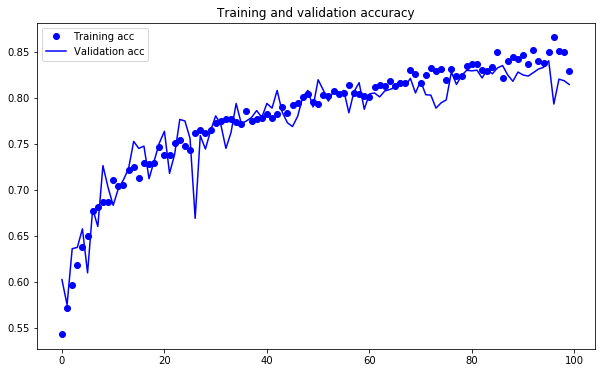

In [40]:
plt.figure(figsize = (10, 6))
plt.plot(epochs, 
         acc, 
         'bo', 
         label = 'Training acc')
plt.plot(epochs, 
         val_acc, 
         'b', 
         label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

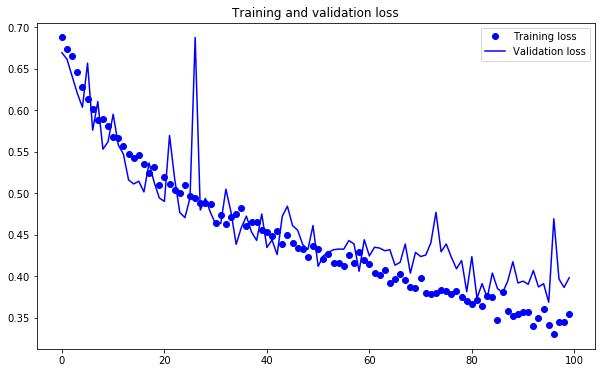

In [41]:
plt.figure(figsize = (10, 6))

plt.plot(epochs, 
         loss, 
         'bo', 
         label = 'Training loss')
plt.plot(epochs, 
         val_loss, 
         'b', 
         label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()